In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from util import generate_linearly_separable_data,plot_hyperplane,train

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
d = 2
n = int(1e6)
# Create a random hyperplane
w = np.random.randn(d)
b = np.random.randn()
samples, labels = generate_linearly_separable_data(w,b,n, d)


In [3]:
# Fit the SVM model
model = train(kkt_thr=1e-3, max_iter=1e7, x_train=samples, y_train=labels,distance_threshold=1)

Downsampling dataset with ratio:0.001
training on the downsampled dataset
training completed!
iterations:2902
number of support vectors:3
filtering original dataset
996593 samples removed
training on the filtered dataset
training completed!
iterations:111292
number of support vectors:6


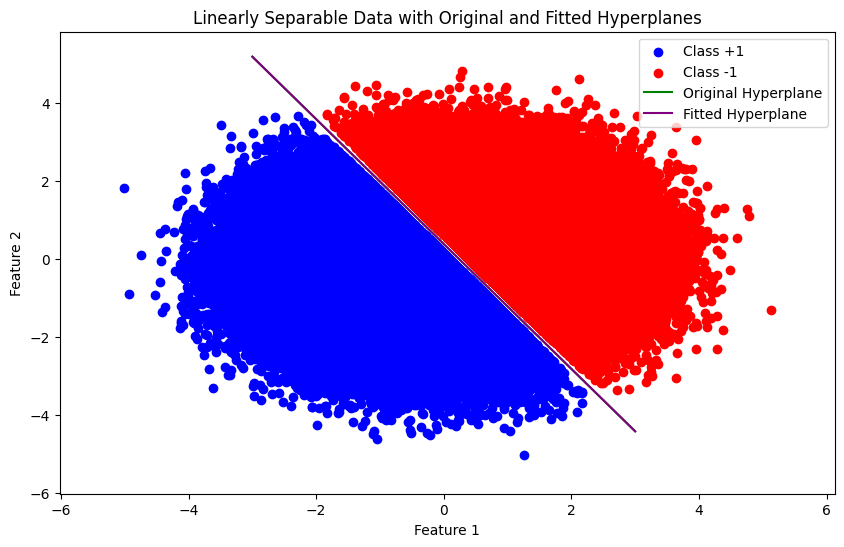

In [4]:
if d==2:
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(samples[labels == 1][:, 0], samples[labels == 1][:, 1], color='blue', label='Class +1')
    plt.scatter(samples[labels == -1][:, 0], samples[labels == -1][:, 1], color='red', label='Class -1')
    # Plot the original hyperplane
    plot_hyperplane(w, b, 'green', 'Original Hyperplane')

    # Plot the fitted hyperplane
    plot_hyperplane(model.w, model.b, 'purple', 'Fitted Hyperplane')
    # 计算x轴的界限
    x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1

    # 设置图的界限
    plt.xlim(x_min, x_max)
    plt.ylim(samples[:, 1].min() - 1, samples[:, 1].max() + 1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Linearly Separable Data with Original and Fitted Hyperplanes')
    plt.legend()
    plt.show()

In [5]:
check_idx = [i for i in range(0,model.x_train.shape[0])]
kkt_violations = model.check_kkt(check_idx)

if np.any(kkt_violations):
    print(f"KKT conditions violated for {np.sum(kkt_violations)} samples.")
else:
    print("All support vectors satisfy KKT conditions.")
print(f'kkt satified ratio:{((model.x_train.shape[0]-np.sum(kkt_violations))/model.x_train.shape[0])*100:.2f}%')

All support vectors satisfy KKT conditions.
kkt satified ratio:100.00%
